**The purpose for this code is to estimate the price of used car using linear regression technique**

In [55]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [56]:
import os
os.chdir('C:/Users/yaser/PycharmProjects/Linear_regression/Data')

In [57]:
df_raw = pd.read_csv("raw_car_price_data.csv")

In [58]:
## checking the first 10 rows
df_raw.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.00,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.00,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.00,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.00,other,212,1.80,Gas,no,1999,Golf IV


In [59]:
df_raw.describe(include = 'all')
# some values are missing based on the first row

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


In [60]:
# drop a column: Model
# axis=1 refers to the column 
df = df_raw.drop(['Model'],axis=1)

In [61]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [62]:
# rule of thumb: It is okay to remove rows with missing taget values as long as they are below 5% of the data
# remove the rows with missing values
df_no_mv = df.dropna(axis=0)

C:\Users\yaser\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

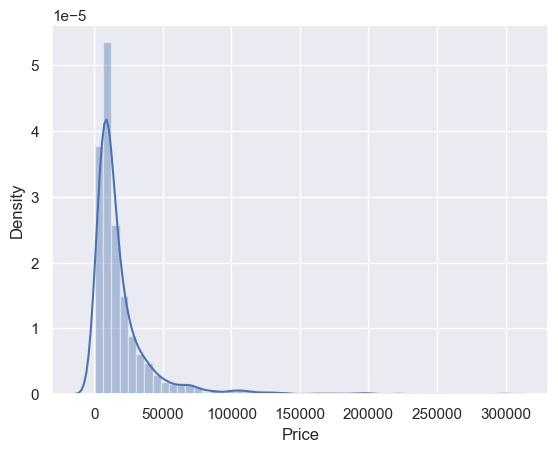

In [63]:
# we see that the distribution is not normal and there are also some outliers (very expensive cars)
sns.distplot(df_no_mv['Price'])

##removing the first top 1% in price 

In [64]:
q = df_no_mv['Price'].quantile(0.99)
df_1 = df_no_mv[df_no_mv['Price']<q]
df_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00


##removing the first top 1% in mileage

C:\Users\yaser\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

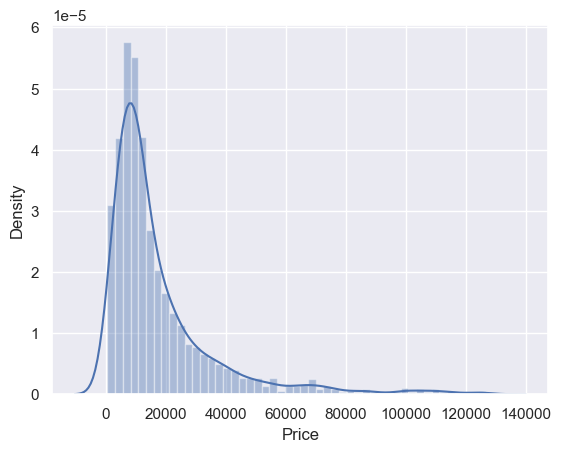

In [65]:
sns.distplot(df_1['Price'])

In [66]:
q = df_1['Mileage'].quantile(0.99)
df_2 = df_1[df_1['Mileage']<q]
df_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.00,3944,3944.00,3944.00,3944,3944,3944.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.88,NaN,161.48,2.75,NaN,NaN,2006.39
std,NaN,19008.21,NaN,96.03,4.98,NaN,NaN,6.60
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,7000.00,NaN,92.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21376.25,NaN,230.00,3.00,NaN,NaN,2011.00


C:\Users\yaser\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

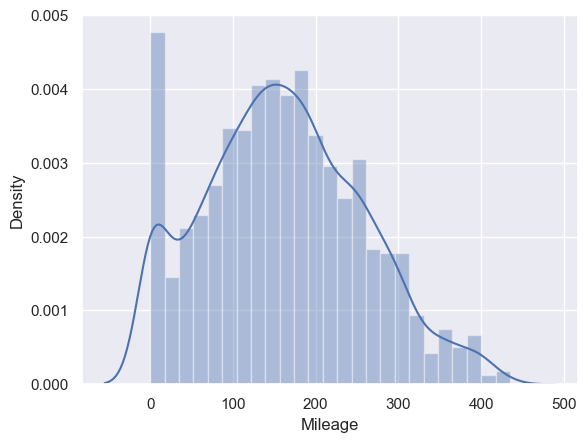

In [67]:
sns.distplot(df_2['Mileage'])

C:\Users\yaser\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

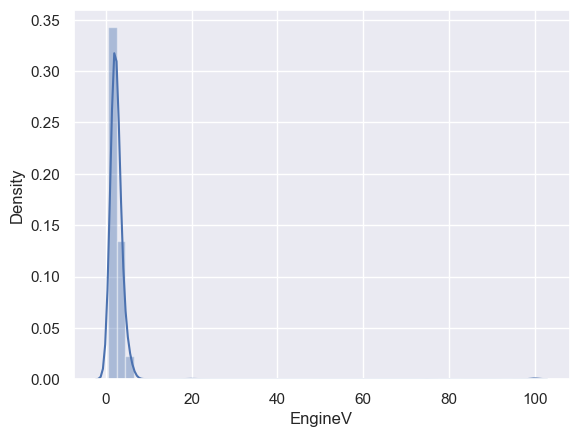

In [68]:
sns.distplot(df_2['EngineV'])

In [69]:
df_3 = df_2[df_2['EngineV']<6.5]
df_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.00,3921,3921.00,3921.00,3921,3921,3921.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.42,NaN,161.28,2.44,NaN,NaN,2006.41
std,NaN,19041.66,NaN,96.07,0.95,NaN,NaN,6.60
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,7000.00,NaN,92.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2008.00
75%,NaN,21500.00,NaN,229.00,3.00,NaN,NaN,2012.00


C:\Users\yaser\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

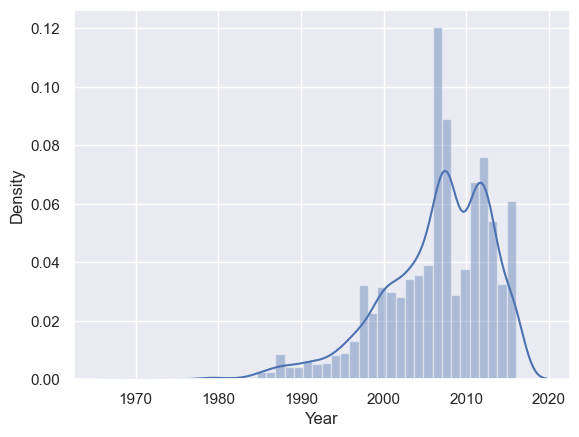

In [70]:
sns.distplot(df_3['Year'])

In [71]:
q = df_3['Year'].quantile(0.01)
df_4 = df_3[df_3['Year']>q]
df_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


In [72]:
# reseting the index from 0 to n
df_4.reset_index(drop='True')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999


In [73]:
df_4.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


In [74]:
df_4.head(20)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
7,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006
8,Renault,10799.00,vagon,193,1.50,Diesel,yes,2012
9,Volkswagen,1400.00,other,212,1.80,Gas,no,1999
10,Renault,11950.00,vagon,177,1.50,Diesel,yes,2011
11,Renault,2500.00,sedan,260,1.79,Petrol,yes,1994


In [75]:
df = df_4

In [76]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011


**_Can we apply linear regression?_**

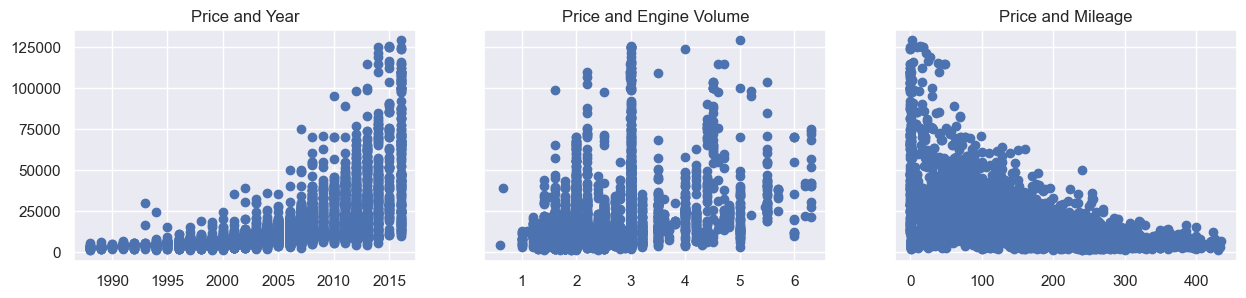

In [77]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(df['Year'],df['Price'])
ax1.set_title('Price and Year')
ax2.scatter(df['EngineV'],df['Price'])
ax2.set_title('Price and Engine Volume')
ax3.scatter(df['Mileage'],df['Price'])
ax3.set_title('Price and Mileage')
plt.show()

In [78]:
log_price = np.log(df['Price']).values.reshape(-1, 1)
df['log_price'] = log_price
df.head()

C:\Users\yaser\AppData\Local\Temp\ipykernel_17340\4262702377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_price'] = log_price


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81


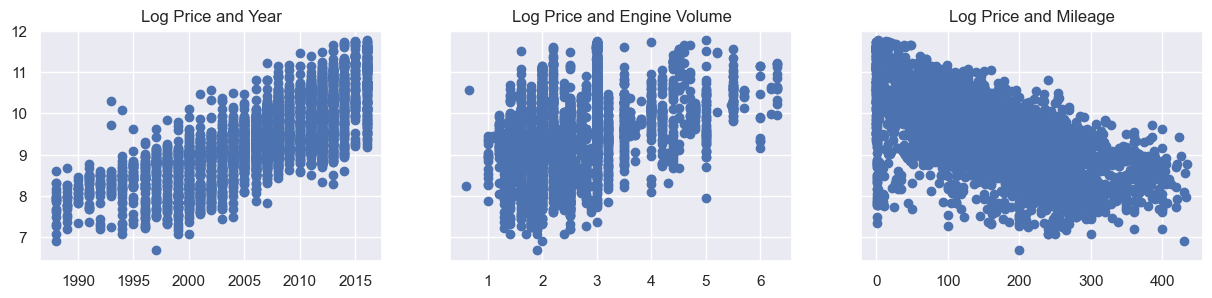

In [79]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(df['Year'],df['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(df['EngineV'],df['log_price'])
ax2.set_title('Log Price and Engine Volume')
ax3.scatter(df['Mileage'],df['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

**checking multicolinearity**

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [81]:
vif

,VIF,features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [82]:
# VIF for year is above 10. So, we can remove it safely

In [83]:
df = df.drop(['Year'],axis=1)

In [84]:
df.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,9.81
7,Audi,14200.00,vagon,200,2.70,Diesel,yes,9.56
8,Renault,10799.00,vagon,193,1.50,Diesel,yes,9.29
9,Volkswagen,1400.00,other,212,1.80,Gas,no,7.24
10,Renault,11950.00,vagon,177,1.50,Diesel,yes,9.39
11,Renault,2500.00,sedan,260,1.79,Petrol,yes,7.82


In [85]:
data_with_dummies = pd.get_dummies(df, drop_first = True)

In [86]:
data_with_dummies.head(10)

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.00,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.00,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.00,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.00,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.00,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
7,14200.00,200,2.70,9.56,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8,10799.00,193,1.50,9.29,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
9,1400.00,212,1.80,7.24,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
10,11950.00,177,1.50,9.39,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
11,2500.00,260,1.79,7.82,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1


**rearrange a bit (bring log_price to the first column)**

In [87]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [88]:
col = ['log_price', 'Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'
      ]

In [89]:
data_preprocessed = data_with_dummies[col]
data_preprocessed.head()

,log_price,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,4200.00,277,2.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.97,7900.00,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.50,13300.00,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.04,23000.00,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.81,18300.00,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [90]:
del data_preprocessed['Price']

In [91]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.97,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.50,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.04,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.81,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear regression model

**Declare the inputs and outputs**

In [92]:
target = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

**scale the data**

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

**train-test split**

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

**create the regression**

In [95]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_hat = reg.predict(x_train)

In [108]:
x_train_df = pd.DataFrame(x_train)
x_train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.26,-1.11,-0.44,-0.49,-0.29,-0.35,-0.38,1.89,-0.26,-0.33,-0.78,-0.33,2.31,-0.41,-0.16,1.33,0.32
1,-0.86,-1.00,-0.44,-0.49,-0.29,2.82,-0.38,-0.53,-0.26,-0.33,-0.78,3.07,-0.43,-0.41,-0.16,-0.75,0.32
2,-0.43,-0.47,-0.44,-0.49,-0.29,-0.35,-0.38,1.89,-0.26,-0.33,1.28,-0.33,-0.43,-0.41,-0.16,-0.75,0.32
3,-0.42,0.58,-0.44,-0.49,3.44,-0.35,-0.38,-0.53,-0.26,-0.33,-0.78,-0.33,-0.43,-0.41,-0.16,1.33,0.32
4,0.38,-0.47,-0.44,-0.49,-0.29,-0.35,-0.38,-0.53,-0.26,3.07,-0.78,-0.33,-0.43,-0.41,-0.16,-0.75,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,-1.67,-0.47,2.28,-0.49,-0.29,-0.35,-0.38,-0.53,-0.26,-0.33,-0.78,-0.33,-0.43,-0.41,-0.16,-0.75,0.32
3089,-0.43,-0.47,-0.44,-0.49,-0.29,-0.35,-0.38,-0.53,-0.26,-0.33,-0.78,-0.33,-0.43,-0.41,-0.16,-0.75,0.32
3090,0.64,3.21,-0.44,2.03,-0.29,-0.35,-0.38,-0.53,-0.26,-0.33,1.28,-0.33,-0.43,-0.41,-0.16,1.33,0.32
3091,1.25,0.05,-0.44,-0.49,-0.29,-0.35,-0.38,-0.53,-0.26,-0.33,-0.78,3.07,-0.43,-0.41,6.17,-0.75,-3.11


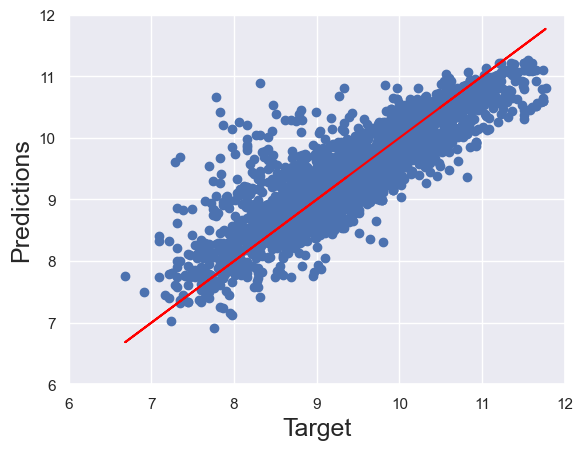

In [42]:
plt.scatter(y_train, y_hat)
plt.plot(y_train, y_train,color="red")
plt.xlabel('Target',size=18)
plt.ylabel('Predictions',size=18)
plt.xlim(6,12)
plt.ylim(6,12)
plt.show()

C:\Users\yaser\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'residual PDF')

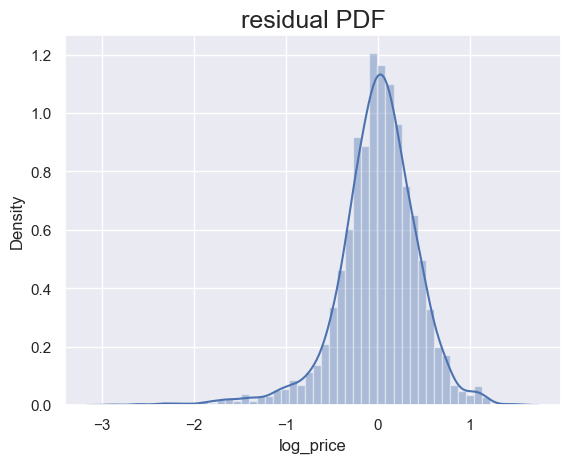

In [43]:
sns.distplot(y_train-y_hat)
plt.title("residual PDF", size=18)

In [44]:
reg.score(x_train,y_train)

0.744996578792662

**Summary**

In [45]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary ['Weights']  = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


## Test the model ## 

In [46]:
y_hat_test = reg.predict(x_test)

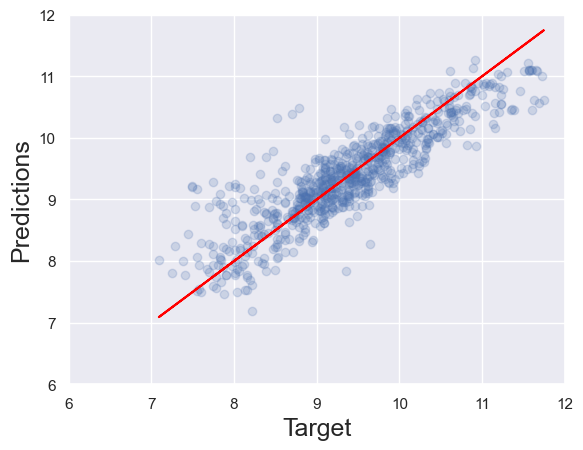

In [47]:
plt.scatter(y_test,y_hat_test, alpha=0.2)
plt.plot(y_test, y_test,color="red")
plt.xlabel('Target',size=18)
plt.ylabel('Predictions',size=18)
plt.xlim(6,12)
plt.ylim(6,12)
plt.show()

In [48]:
# reseting the index (the original indicies must be omitted)
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [49]:
df_performance = pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
df_performance.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [50]:
df_performance ['Target'] = np.exp(y_test)
df_performance

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [51]:
df_performance['Residual'] = df_performance['Target'] - df_performance['Prediction']

In [52]:
df_performance['Difference%'] = np.abs( 100 * df_performance['Residual']/df_performance['Target'])

In [53]:
df_performance.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [54]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%0.2f' %x)
df_performance.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74
